In [1]:
#load data from a CSV file using pandas
import pandas as pd

df = pd.read_csv('metadata.csv', low_memory=False)

In [2]:
#explore data
print(df.head())          # Preview first few rows
print(df.shape)           # Dimensions
print(df.info())          # Data types and non-null counts
print(df.isnull().sum())  # Missing values
print(df.describe())      # Stats for numerical columns

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [6]:
df_cleaned = df.dropna(subset=['title', 'abstract', 'publish_time']).copy()
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')
df_cleaned['year'] = df_cleaned['publish_time'].dt.year

In [ ]:
# Add a new column for the word count of the abstract
df_cleaned.loc[:, 'abstract_word_count'] = df_cleaned['abstract'].apply(lambda x: len(str(x).split()))

<Axes: title={'center': 'Publications by Year'}, xlabel='year'>

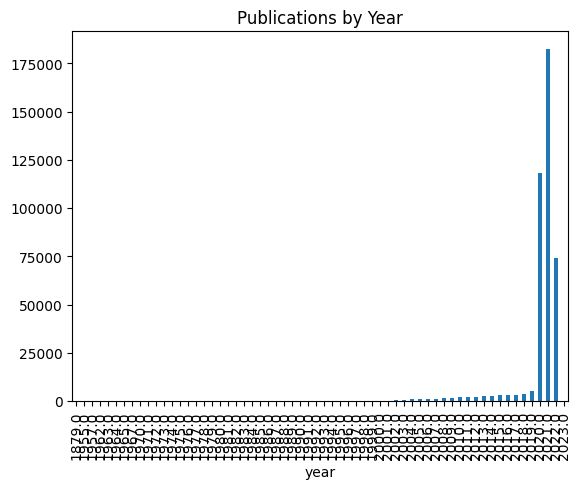

In [ ]:
#Publications by Year

year_counts = df_cleaned['year'].value_counts().sort_index()
year_counts.plot(kind='bar', title='Publications by Year')

<Axes: title={'center': 'Top Publishing Journals'}, ylabel='journal'>

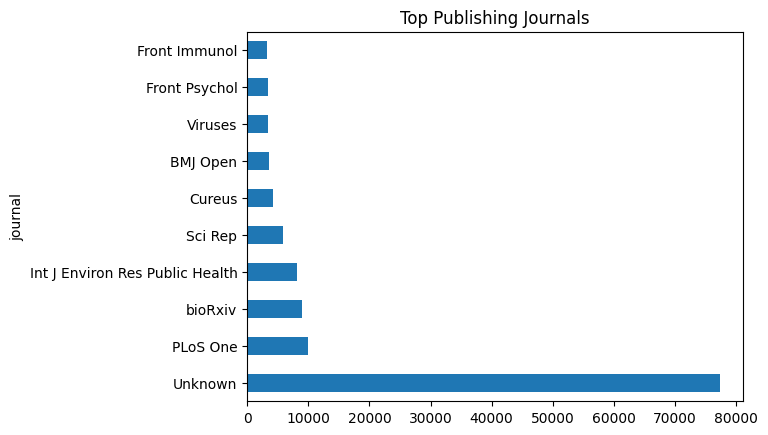

In [13]:
#top journals
top_journals = df_cleaned['journal'].value_counts().head(10)
top_journals.plot(kind='barh', title='Top Publishing Journals')

<Axes: title={'center': 'Most Frequent Words in Titles'}, xlabel='word'>

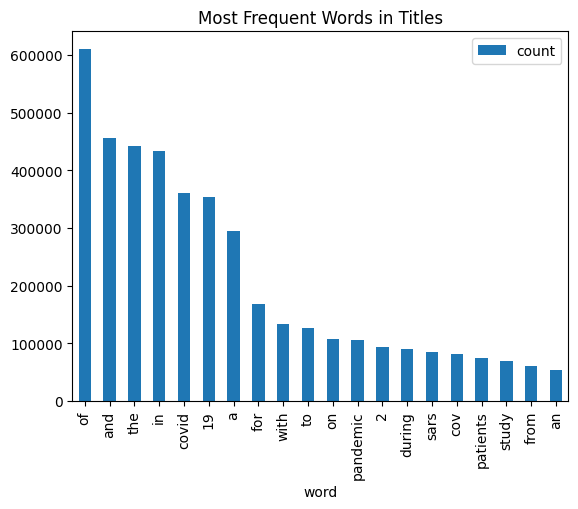

In [14]:
#Word Frequency in Titles
from collections import Counter
import re

words = ' '.join(df_cleaned['title'].dropna()).lower()
words = re.findall(r'\b\w+\b', words)
common_words = Counter(words).most_common(20)

# Convert to DataFrame for plotting
word_df = pd.DataFrame(common_words, columns=['word', 'count'])
word_df.plot.bar(x='word', y='count', title='Most Frequent Words in Titles')

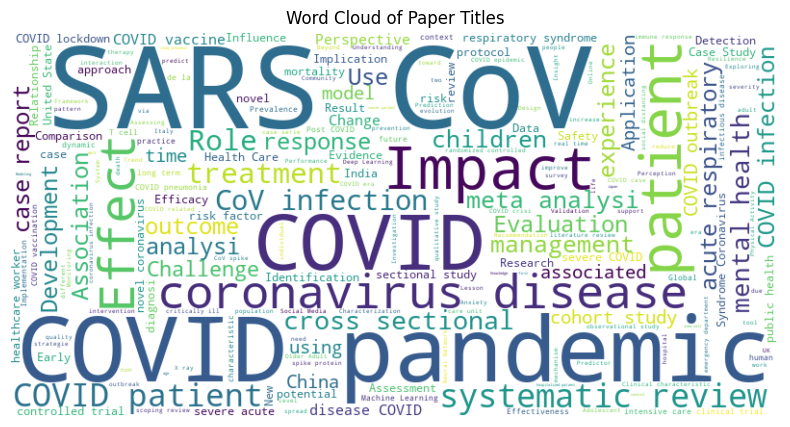

In [15]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df_cleaned['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()

<Axes: title={'center': 'Distribution by Source'}, ylabel='count'>

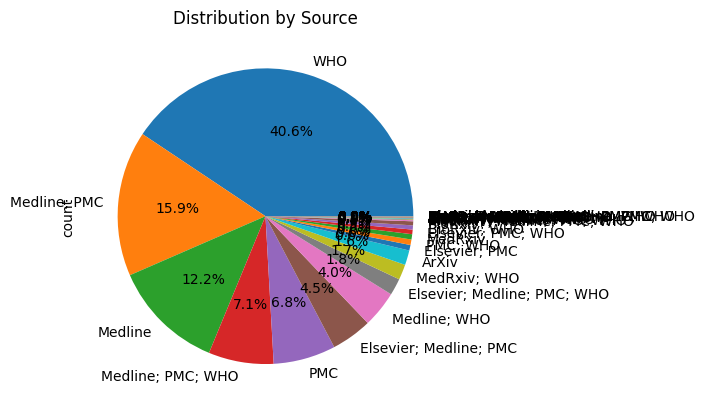

In [16]:
#Distribution by Source
df_cleaned['source_x'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution by Source')